In [1]:
import numpy as np
import copy
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import training_module as tm


In [3]:
enc=tm.download_ENCODE_data(cell_line='IMR-90', assembly='hg19',histones=False, total_rna=True, tf=False)

Selected cell line to predict: IMR-90
Selected assembly: hg19
Selected signal type: signal p-value
Number of replicas: 6


Process replicas: 100%|████████████████████████████████████████| 6/6 [00:00<00:00, 187.02it/s]


Experiments found in ENCODE for the selected cell line:
RNA-seq-minus-total
RNA-seq-plus-total
Downoaded data stored at:  ENCODE_data/IMR-90_hg19


In [3]:
pre_data=tm.preprocess('../data/GM12878_hg19/')

Loading data from: ../data/GM12878_hg19/
Using 152 tracks: ['ARID3A' 'ARNT' 'ASH2L' 'ATF2' 'ATF7' 'BACH1' 'BATF' 'BCL11A' 'BCL3'
 'BCLAF1' 'BHLHE40' 'BMI1' 'BRCA1' 'CBFB' 'CBX3' 'CBX5' 'CEBPB' 'CEBPZ'
 'CHD1' 'CHD2' 'CHD4' 'CREM' 'CTCF' 'CUX1' 'DPF2' 'E2F4' 'E2F8' 'E4F1'
 'EBF1' 'EED' 'EGR1' 'ELF1' 'ELK1' 'EP300' 'ESRRA' 'ETS1' 'ETV6' 'EZH2'
 'FOXK2' 'GABPA' 'GATAD2B' 'H2AFZ' 'H3K27ac' 'H3K27me3' 'H3K36me3'
 'H3K4me1' 'H3K4me2' 'H3K4me3' 'H3K79me2' 'H3K9ac' 'H3K9me3' 'H4K20me1'
 'HCFC1' 'HDAC2' 'HDAC6' 'HDGF' 'HSF1' 'IKZF1' 'IKZF2' 'IRF3' 'IRF4'
 'IRF5' 'JUNB' 'JUND' 'KDM1A' 'KDM5A' 'KLF5' 'LARP7' 'MAFK' 'MAX' 'MAZ'
 'MEF2A' 'MEF2B' 'MEF2C' 'MLLT1' 'MTA2' 'MTA3' 'MXI1' 'MYB' 'NBN' 'NFATC1'
 'NFATC3' 'NFE2' 'NFIC' 'NFXL1' 'NFYA' 'NFYB' 'NKRF' 'NR2C1' 'NR2C2'
 'NR2F1' 'NRF1' 'PAX5' 'PAX8' 'PBX3' 'PKNOX1' 'POLR2A' 'POLR2AphosphoS2'
 'POLR2AphosphoS5' 'RAD21' 'RAD51' 'RB1' 'RBBP5' 'RCOR1' 'RELB' 'REST'
 'RFX5' 'RNA' 'RUNX3' 'RXRA' 'SIN3A' 'SIX5' 'SKIL' 'SMAD1' 'SMAD5'
 'SMARCA5' 'SMC3' 'SP

In [4]:
x_pre,y_pre,feature=pre_data.get_training_data(features=pre_data.get_features())#, typespath='../data/types/GM12878_hg19/')

print(x_pre.shape, y_pre.shape, feature.shape)

(52452, 760) (52452,) (760,)


In [7]:
df=pd.DataFrame(np.concatenate((x_pre,y_pre.reshape(-1,1)), axis=1), columns=np.concatenate((feature,['labels'])))

In [17]:
# df.to_hdf('../processed_data/GM12878_hg19.h5', key='df', mode='w')
df.to_csv('../processed_data/GM12878_hg19.csv.zip', compression='zip', index=False)

In [20]:
df.head(10)

,ARID3A_0,ARID3A_R1,ARID3A_L1,ARID3A_R2,ARID3A_L2,ARNT_0,ARNT_R1,ARNT_L1,ARNT_R2,ARNT_L2,...,ZSCAN29_R1,ZSCAN29_L1,ZSCAN29_R2,ZSCAN29_L2,ZZZ3_0,ZZZ3_R1,ZZZ3_L1,ZZZ3_R2,ZZZ3_L2,labels
0,0.518124,0.711169,0.007674,0.859476,0.013843,0.611671,0.767508,0.006220,0.926809,0.011940,...,0.808864,0.022790,0.855164,0.030297,0.961543,0.932235,0.994941,0.809686,0.998118,0.0
1,0.711169,0.859476,0.518124,1.000000,0.007674,0.767508,0.926809,0.611671,0.693929,0.006220,...,0.855164,0.451788,1.000000,0.022790,0.932235,0.809686,0.961543,0.481691,0.994941,0.0
2,0.859476,1.000000,0.711169,1.000000,0.518124,0.926809,0.693929,0.767508,1.000000,0.611671,...,1.000000,0.808864,1.000000,0.451788,0.809686,0.481691,0.932235,0.453232,0.961543,0.0
3,1.000000,1.000000,0.859476,1.000000,0.711169,0.693929,1.000000,0.926809,1.000000,0.767508,...,1.000000,0.855164,1.000000,0.808864,0.481691,0.453232,0.809686,0.220880,0.932235,0.0
4,1.000000,1.000000,1.000000,0.942866,0.859476,1.000000,1.000000,0.693929,1.000000,0.926809,...,1.000000,1.000000,0.779985,0.855164,0.453232,0.220880,0.481691,0.416525,0.809686,0.0
5,1.000000,0.942866,1.000000,0.914639,1.000000,1.000000,1.000000,1.000000,0.533348,0.693929,...,0.779985,1.000000,0.777778,1.000000,0.220880,0.416525,0.453232,0.473861,0.481691,0.0
6,0.942866,0.914639,1.000000,0.947587,1.000000,1.000000,0.533348,1.000000,0.700089,1.000000,...,0.777778,1.000000,1.000000,1.000000,0.416525,0.473861,0.220880,0.515355,0.453232,0.0
7,0.914639,0.947587,0.942866,1.000000,1.000000,0.533348,0.700089,1.000000,0.920483,1.000000,...,1.000000,0.779985,1.000000,1.000000,0.473861,0.515355,0.416525,0.345503,0.220880,0.0
8,0.947587,1.000000,0.914639,1.000000,0.942866,0.700089,0.920483,0.533348,0.644512,1.000000,...,1.000000,0.777778,1.000000,0.779985,0.515355,0.345503,0.473861,0.390981,0.416525,0.0
9,1.000000,1.000000,0.947587,1.000000,0.914639,0.920483,0.644512,0.700089,0.846027,0.533348,...,1.000000,1.000000,1.000000,0.777778,0.345503,0.390981,0.515355,0.328405,0.473861,0.0


In [19]:
df2=pd.read_csv('../processed_data/GM12878_hg19.csv.zip', compression='zip')

df2.head(10)

,ARID3A_0,ARID3A_R1,ARID3A_L1,ARID3A_R2,ARID3A_L2,ARNT_0,ARNT_R1,ARNT_L1,ARNT_R2,ARNT_L2,...,ZSCAN29_R1,ZSCAN29_L1,ZSCAN29_R2,ZSCAN29_L2,ZZZ3_0,ZZZ3_R1,ZZZ3_L1,ZZZ3_R2,ZZZ3_L2,labels
0,0.518124,0.711169,0.007674,0.859476,0.013843,0.611671,0.767508,0.006220,0.926809,0.011940,...,0.808864,0.022790,0.855164,0.030297,0.961543,0.932235,0.994941,0.809686,0.998118,0.0
1,0.711169,0.859476,0.518124,1.000000,0.007674,0.767508,0.926809,0.611671,0.693929,0.006220,...,0.855164,0.451788,1.000000,0.022790,0.932235,0.809686,0.961543,0.481691,0.994941,0.0
2,0.859476,1.000000,0.711169,1.000000,0.518124,0.926809,0.693929,0.767508,1.000000,0.611671,...,1.000000,0.808864,1.000000,0.451788,0.809686,0.481691,0.932235,0.453232,0.961543,0.0
3,1.000000,1.000000,0.859476,1.000000,0.711169,0.693929,1.000000,0.926809,1.000000,0.767508,...,1.000000,0.855164,1.000000,0.808864,0.481691,0.453232,0.809686,0.220880,0.932235,0.0
4,1.000000,1.000000,1.000000,0.942866,0.859476,1.000000,1.000000,0.693929,1.000000,0.926809,...,1.000000,1.000000,0.779985,0.855164,0.453232,0.220880,0.481691,0.416525,0.809686,0.0
5,1.000000,0.942866,1.000000,0.914639,1.000000,1.000000,1.000000,1.000000,0.533348,0.693929,...,0.779985,1.000000,0.777778,1.000000,0.220880,0.416525,0.453232,0.473861,0.481691,0.0
6,0.942866,0.914639,1.000000,0.947587,1.000000,1.000000,0.533348,1.000000,0.700089,1.000000,...,0.777778,1.000000,1.000000,1.000000,0.416525,0.473861,0.220880,0.515355,0.453232,0.0
7,0.914639,0.947587,0.942866,1.000000,1.000000,0.533348,0.700089,1.000000,0.920483,1.000000,...,1.000000,0.779985,1.000000,1.000000,0.473861,0.515355,0.416525,0.345503,0.220880,0.0
8,0.947587,1.000000,0.914639,1.000000,0.942866,0.700089,0.920483,0.533348,0.644512,1.000000,...,1.000000,0.777778,1.000000,0.779985,0.515355,0.345503,0.473861,0.390981,0.416525,0.0
9,1.000000,1.000000,0.947587,1.000000,0.914639,0.920483,0.644512,0.700089,0.846027,0.533348,...,1.000000,1.000000,1.000000,0.777778,0.345503,0.390981,0.515355,0.328405,0.473861,0.0


In [5]:
fts=[xx for xx in pre_data.get_features() if 'H3K' in xx or 'H4K' in xx or 'RNA' in xx]
print(pre_data.get_features(),'\n\n', fts)

['ARID3A', 'ARNT', 'ASH2L', 'ATF2', 'ATF7', 'BACH1', 'BATF', 'BCL11A', 'BCL3', 'BCLAF1', 'BHLHE40', 'BMI1', 'BRCA1', 'CBFB', 'CBX3', 'CBX5', 'CEBPB', 'CEBPZ', 'CHD1', 'CHD2', 'CHD4', 'CREM', 'CTCF', 'CUX1', 'DPF2', 'E2F4', 'E2F8', 'E4F1', 'EBF1', 'EED', 'EGR1', 'ELF1', 'ELK1', 'EP300', 'ESRRA', 'ETS1', 'ETV6', 'EZH2', 'FOXK2', 'GABPA', 'GATAD2B', 'H2AFZ', 'H3K27ac', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me2', 'H3K4me3', 'H3K79me2', 'H3K9ac', 'H3K9me3', 'H4K20me1', 'HCFC1', 'HDAC2', 'HDAC6', 'HDGF', 'HSF1', 'IKZF1', 'IKZF2', 'IRF3', 'IRF4', 'IRF5', 'JUNB', 'JUND', 'KDM1A', 'KDM5A', 'KLF5', 'LARP7', 'MAFK', 'MAX', 'MAZ', 'MEF2A', 'MEF2B', 'MEF2C', 'MLLT1', 'MTA2', 'MTA3', 'MXI1', 'MYB', 'NBN', 'NFATC1', 'NFATC3', 'NFE2', 'NFIC', 'NFXL1', 'NFYA', 'NFYB', 'NKRF', 'NR2C1', 'NR2C2', 'NR2F1', 'NRF1', 'PAX5', 'PAX8', 'PBX3', 'PKNOX1', 'POLR2A', 'POLR2AphosphoS2', 'POLR2AphosphoS5', 'RAD21', 'RAD51', 'RB1', 'RBBP5', 'RCOR1', 'RELB', 'REST', 'RFX5', 'RNA', 'RUNX3', 'RXRA', 'SIN3A', 'SIX5', 'SK

(52452, 760) (52452,) (760,)


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(x_pre, y_pre, test_size=0.4, random_state=103)

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(31471, 760) (31471,) (20981, 760) (20981,)


In [7]:
hidden_units = [32, 32]
learning_rate = 0.001
dropout_rate = 0.5
num_epochs = 50
batch_size = 64
num_features=feature.shape[0]
num_classes=5

In [8]:
def run_experiment(model, x_train, y_train):
    # Compile the model.
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[keras.metrics.SparseCategoricalAccuracy(name="accuracy")],
    )
    # Create an early stopping callback.
    early_stopping = keras.callbacks.EarlyStopping(
        monitor="val_accuracy", patience=50, restore_best_weights=True
    )
    # Fit the model.
    history = model.fit(
        x=x_train,
        y=y_train,
        epochs=num_epochs,
        batch_size=batch_size,
        validation_split=0.15,
        callbacks=[early_stopping],
    )

    return history


In [9]:
def display_learning_curves(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.plot(history.history["loss"])
    ax1.plot(history.history["val_loss"])
    ax1.legend(["train", "test"], loc="upper right")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")

    ax2.plot(history.history["accuracy"])
    ax2.plot(history.history["val_accuracy"])
    ax2.legend(["train", "test"], loc="upper right")
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")
    plt.show()


In [10]:
def create_ffn(hidden_units, dropout_rate, name=None):
    fnn_layers = []

    for units in hidden_units:
        fnn_layers.append(layers.BatchNormalization())
        fnn_layers.append(layers.Dropout(dropout_rate))
        fnn_layers.append(layers.Dense(units, activation=tf.nn.gelu))

    return keras.Sequential(fnn_layers, name=name)


In [11]:
def create_baseline_model(hidden_units, num_classes, dropout_rate=0.2):
    inputs = layers.Input(shape=(num_features,), name="input_features")
    x = create_ffn(hidden_units, dropout_rate, name=f"ffn_block1")(inputs)
    for block_idx in range(4):
        # Create an FFN block.
        x1 = create_ffn(hidden_units, dropout_rate, name=f"ffn_block{block_idx + 2}")(x)
        # Add skip connection.
        x = layers.Add(name=f"skip_connection{block_idx + 2}")([x, x1])
    # Compute logits.
    logits = layers.Dense(num_classes, name="logits")(x)
    # Create the model.
    return keras.Model(inputs=inputs, outputs=logits, name="baseline")


In [12]:
baseline_model = create_baseline_model(hidden_units, num_classes, dropout_rate)
baseline_model.summary()

Metal device set to: Apple M1 Max

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB



2022-10-26 22:22:30.809045: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-26 22:22:30.809179: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "baseline"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_features (InputLayer)    [(None, 760)]        0           []                               
                                                                                                  
 ffn_block1 (Sequential)        (None, 32)           28576       ['input_features[0][0]']         
                                                                                                  
 ffn_block2 (Sequential)        (None, 32)           2368        ['ffn_block1[0][0]']             
                                                                                                  
 skip_connection2 (Add)         (None, 32)           0           ['ffn_block1[0][0]',             
                                                                  'ffn_block2[0][0]']      

In [13]:
history = run_experiment(baseline_model, X_train, Y_train)


Epoch 1/50


2022-10-26 22:22:33.837395: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-26 22:22:34.865182: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


418/418 [==============================] - ETA: 0s - loss: 1.4837 - accuracy: 0.4684

2022-10-26 22:22:48.927145: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


418/418 [==============================] - 16s 33ms/step - loss: 1.4837 - accuracy: 0.4684 - val_loss: 0.9502 - val_accuracy: 0.6168
Epoch 2/50
418/418 [==============================] - 12s 30ms/step - loss: 1.0294 - accuracy: 0.5996 - val_loss: 0.8239 - val_accuracy: 0.6844
Epoch 3/50
418/418 [==============================] - 12s 29ms/step - loss: 0.9276 - accuracy: 0.6386 - val_loss: 0.7823 - val_accuracy: 0.6929
Epoch 4/50
418/418 [==============================] - 12s 29ms/step - loss: 0.8702 - accuracy: 0.6592 - val_loss: 0.7396 - val_accuracy: 0.7136
Epoch 5/50
418/418 [==============================] - 12s 30ms/step - loss: 0.8335 - accuracy: 0.6707 - val_loss: 0.7121 - val_accuracy: 0.7253
Epoch 6/50
418/418 [==============================] - 12s 30ms/step - loss: 0.8041 - accuracy: 0.6833 - val_loss: 0.6919 - val_accuracy: 0.7329
Epoch 7/50
418/418 [==============================] - 12s 29ms/step - loss: 0.7918 - accuracy: 0.6867 - val_loss: 0.6773 - val_accuracy: 0.7382
Epo

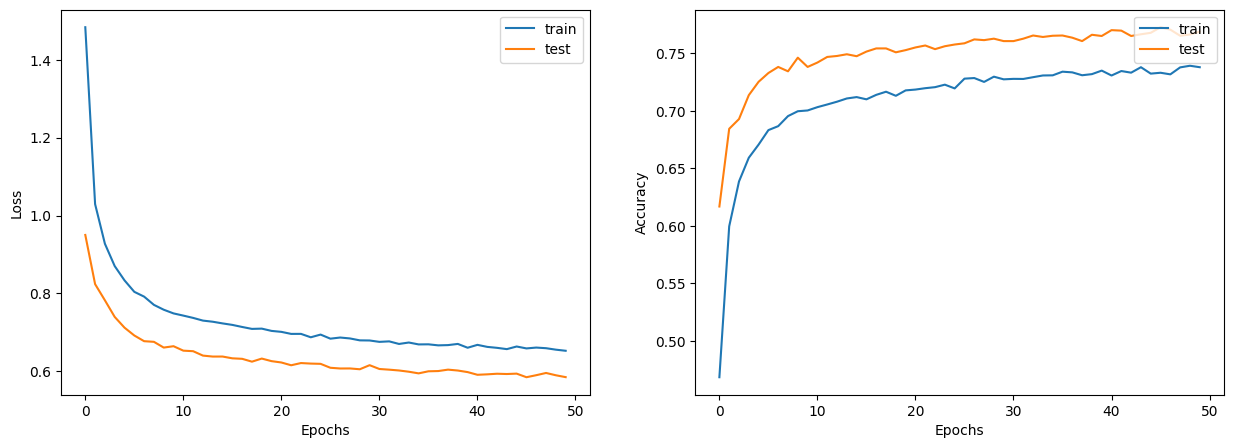

In [14]:
display_learning_curves(history)

In [15]:
keras.utils.plot_model(baseline_model, to_file='model.png', show_shapes=True, dpi=50, show_layer_names=False, show_layer_activations=True, rankdir='TB')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [16]:
inputs = keras.Input(shape=X_train.shape[1])

# x1 = layers.Dense(32, activation="relu")(inputs)
x = layers.Dense(64, activation="relu")(inputs)
x = layers.Dense(128, activation="relu",bias_regularizer=tf.keras.regularizers.L2(0.001))(x)
# x = layers.Dense(512, activation="relu")(x)
x = layers.Dense(64, activation="relu", bias_regularizer=tf.keras.regularizers.L2(0.001))(x)
# x = layers.add([x,x1])
# x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(len(np.unique(Y_train)), activation='relu')(x)

# del model
model = keras.Model(name="Predict-Chromatin-Types", inputs=inputs, outputs=outputs)

model.summary()

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(5e-4),
    metrics=["accuracy"],
)

Model: "Predict-Chromatin-Types"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 760)]             0         
                                                                 
 dense_10 (Dense)            (None, 64)                48704     
                                                                 
 dense_11 (Dense)            (None, 128)               8320      
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 5)                 325       
                                                                 
Total params: 65,605
Trainable params: 65,6

In [17]:
history = model.fit(X_train, Y_train, batch_size=64, epochs=60, validation_split=0.2)

Epoch 1/60
  1/394 [..............................] - ETA: 2:12 - loss: 1.6366 - accuracy: 0.2188

2022-10-26 22:35:15.797350: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


394/394 [==============================] - ETA: 0s - loss: 1.0997 - accuracy: 0.5578

2022-10-26 22:35:19.522703: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


394/394 [==============================] - 5s 11ms/step - loss: 1.0997 - accuracy: 0.5578 - val_loss: 0.8949 - val_accuracy: 0.6521
Epoch 2/60
394/394 [==============================] - 4s 10ms/step - loss: 0.9142 - accuracy: 0.6443 - val_loss: 0.8613 - val_accuracy: 0.6604
Epoch 3/60
394/394 [==============================] - 4s 10ms/step - loss: 0.8637 - accuracy: 0.6597 - val_loss: 0.8395 - val_accuracy: 0.6581
Epoch 4/60
394/394 [==============================] - 4s 11ms/step - loss: 0.8218 - accuracy: 0.6779 - val_loss: 0.7489 - val_accuracy: 0.7041
Epoch 5/60
255/394 [==================>...........] - ETA: 4s - loss: 0.7911 - accuracy: 0.6887

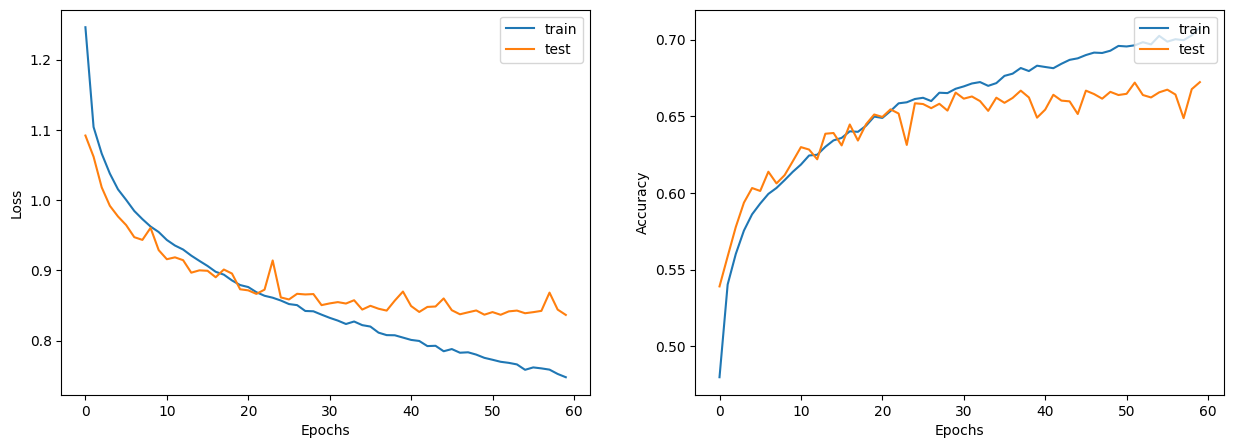

In [20]:
display_learning_curves(history)

In [ ]:
print(Y_test.shape, X_test.shape)
type_test={}

for val in np.unique(Y_test):
    ind = np.where(Y_test==val)[0]
    X_type=X_test[ind,:]
    Y_type=Y_test[ind]
    name=list(map(data.int_to_type.get, [val]))[0]

    print(name, Y_type.shape, X_type.shape)
    type_test[name] = (X_type,Y_type)

print(type_test.keys())


for key in type_test.keys():
    print("Type: ", key)
    test_scores = model.evaluate(type_test[key][0], type_test[key][1], verbose=2)
    print("Test loss:", test_scores[0])
    print("Test accuracy:", test_scores[1])